<a href="https://colab.research.google.com/github/JesseKiguta/intro_to_ml_summative/blob/main/Intro_to_ML_summative_Jesse_Kiguta_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Case Study and Implementation: CleanAir Sentinel
Air pollution is becoming a major concern in many African cities due to fast urbanization, increased motor traffic, and seasonal dust storms. Vulnerable groups including children, the elderly, and people with pre-existing conditions are the most affected by these high pollution levels, which also lead to an increase in respiratory disorders, cardiovascular diseases, and early mortality. However, the current public health infrastructure is ill-prepared to anticipate and efficiently respond to pollution spikes, and many African cities lack comprehensive, real-time air quality monitoring systems.

Using easily accessible environmental data, CleanAir Sentinel seeks to create a machine learning model that can categorize air quality into risk levels (Good, Moderate, Poor, and Hazardous) and predict the corresponding threats to health.

Helping local health authorities in African cities predict pollution episodes and provide early warnings to reduce health risks is the primary function of CleanAir Sentinel. For instance, the model can assist in informing policies like advising vulnerable populations to stay indoors, optimizing healthcare responses, or managing city-wide traffic restrictions during the dry season, when African cities experience severe dust storms or when emissions from increased traffic or industry rise.

Additionally, CleanAir Sentinel can enable NGOs and local governments to better allocate resources and take preventative measures, which will improve public health outcomes and air quality management throughout the continent.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers

# The Dataset
**Brief Description:**
The dataset consists of various air quality parameters collected from monitoring stations, combined with external factors influencing pollution levels. It includes:

1. Air Pollution Indicators: PM2.5, PM10, NO₂, CO, SO₂, O₃, etc.
2. Weather Conditions: Temperature, Humidity, Wind Speed, Atmospheric Pressure.
3. Human factors: Population density and industrial zone proximity.
4. Health Risk Classification: Target variable indicating air quality categories (Good, Moderate, Poor, Hazardous) via one-hot encoding.

The model processes this data using classification algorithms (SVM, Neural Networks) to predict risk levels.

In [2]:
df = pd.read_csv('/content/updated_pollution_dataset.csv')

print(df.isnull().sum())
print(df.shape)
df.head(15)

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64
(5000, 10)


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


In [3]:
df_encoded = pd.get_dummies(df, columns=['Air Quality'], drop_first=False)

print(df_encoded.shape)
df_encoded.head(15)

(5000, 13)


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality_Good,Air Quality_Hazardous,Air Quality_Moderate,Air Quality_Poor
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,False,False,True,False
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,False,False,True,False
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,False,False,True,False
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,True,False,False,False
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,True,False,False,False
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,False,True,False,False
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,False,False,False,True
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,False,False,True,False
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,False,False,False,True
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,False,False,False,True


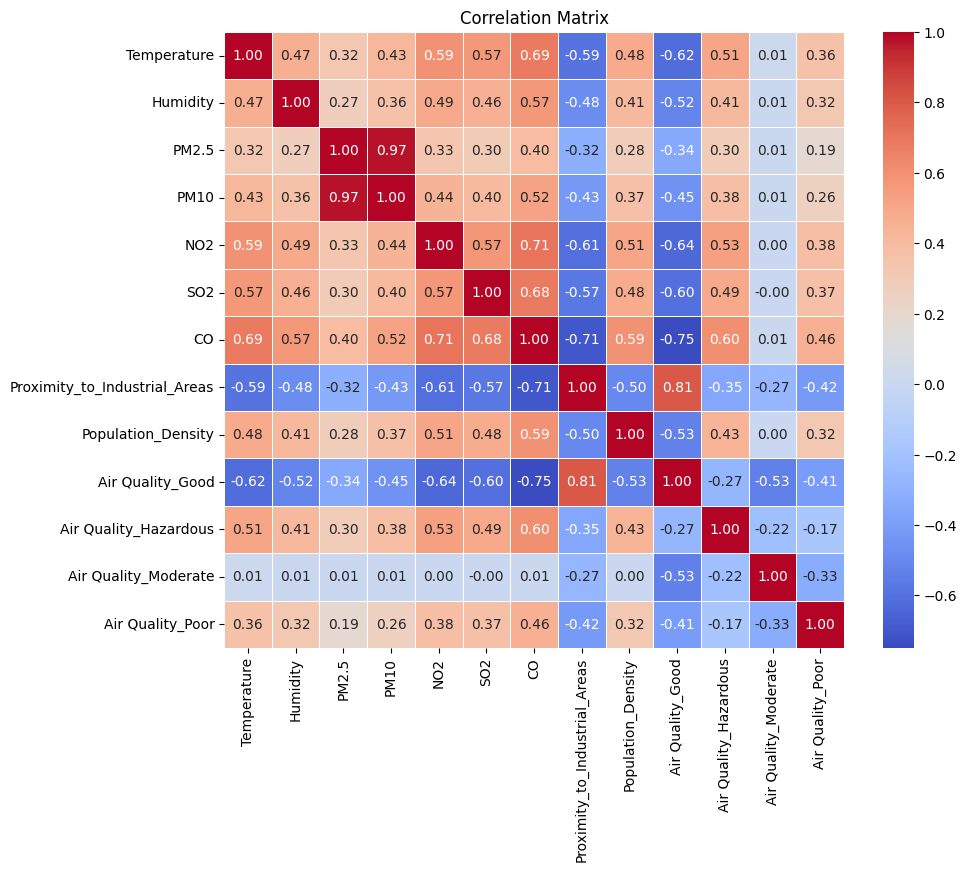

In [4]:
# Correlation matrix
def plot_correlation_matrix(df, figsize=(10, 8), cmap='coolwarm', annot=True, title='Correlation Matrix'):
    correlation_matrix = df.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=annot, cmap=cmap, fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.show()

plot_correlation_matrix(df_encoded)

## Making an SVM (Traditional ML model) with grid search

In [5]:
def prepare_data(df, target_columns):
    X = df.drop(columns=target_columns)
    y = df[target_columns]
    y_svm = np.argmax(y.values, axis=1)  # Convert one-hot encoding to class labels
    return X, y_svm

def split_data(X, y_svm, test_size=0.2, random_state=42):
    return train_test_split(X, y_svm, test_size=test_size, random_state=random_state)

def train_svm(X_train, y_train):
    svm = SVC(decision_function_shape='ovr')

    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']
    }

    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_, grid_search.best_params_

def save_model(model, filename="best_svm_model.pkl"):
    joblib.dump(model, filename)
    print(f"Model saved as {filename}")


target_columns = ['Air Quality_Good', 'Air Quality_Moderate', 'Air Quality_Poor', 'Air Quality_Hazardous']
X, y_svm = prepare_data(df_encoded, target_columns)

X_train, X_test, y_train_svm, y_test_svm = split_data(X, y_svm)

best_model, best_params = train_svm(X_train, y_train_svm)
print(f"Best Parameters: {best_params}")

save_model(best_model)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Model saved as best_svm_model.pkl


Accuracy: 0.9440
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
    Moderate       0.95      0.96      0.96       294
        Poor       0.84      0.88      0.86       186
   Hazardous       0.91      0.81      0.86       111

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.92      1000
weighted avg       0.94      0.94      0.94      1000



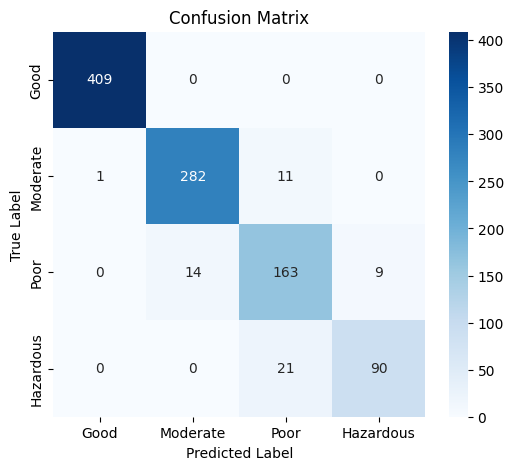

In [6]:
def evaluate_model(model, X_test, y_test, class_labels):
    y_pred = model.predict(X_test)

    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(classification_report(y_test, y_pred, target_names=class_labels))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

class_labels = ["Good", "Moderate", "Poor", "Hazardous"]
evaluate_model(best_model, X_test, y_test_svm, class_labels)

#Task: Define a function that creates models without and With specified Optimization techniques


#SECTION 1: Model Architecture:





In [22]:
def prepare_data(df, target_columns):
    X = df.drop(columns=target_columns)
    y = df[target_columns]
    return X, y

def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

def define_model(optimization: str, regularization_datatype, early_stopping: bool, dropout: float, learning_rate: float):
    model = Sequential()

    model.add(Dense(64, activation='relu', kernel_regularizer=regularization_datatype, input_shape=(X_train.shape[1],)))

    model.add(Dense(64, activation='relu', kernel_regularizer=regularization_datatype))
    if dropout > 0:
        model.add(Dropout(dropout))

    model.add(Dense(4, activation='softmax'))

    optimizers = {
        'nadam':Nadam(learning_rate=learning_rate),
        'adam': Adam(learning_rate=learning_rate),
        'sgd': SGD(learning_rate=learning_rate),
        'rmsprop': RMSprop(learning_rate=learning_rate)
    }

    if optimization.lower() not in optimizers:
        raise ValueError("Invalid optimizer. Choose from 'adam', 'sgd', or 'rmsprop'.")

    optimizer = optimizers[optimization.lower()]

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

    return model, callbacks

def train_model(model, X_train, y_train, epochs=50, batch_size=16, validation_split=0.2):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=1)
    return history

def save_nn_model(model, filename="nn_model_default.keras"):
    model.save(filename)
    print(f"Model saved as {filename}")

target_columns = ['Air Quality_Good', 'Air Quality_Moderate', 'Air Quality_Poor', 'Air Quality_Hazardous']
X, y = prepare_data(df_encoded, target_columns)

X_train, X_test, y_train, y_test = split_data(X, y)

X_train_scaled, X_test_scaled, _ = scale_features(X_train, X_test)

model, callbacks = define_model(
    optimization='adam',
    regularization_datatype=None,
    early_stopping=False,
    dropout=0.0,
    learning_rate=0.001
)

history = train_model(model, X_train_scaled, y_train)

save_nn_model(model)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7309 - loss: 0.7357 - val_accuracy: 0.8625 - val_loss: 0.3222
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8971 - loss: 0.2630 - val_accuracy: 0.8988 - val_loss: 0.2264
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9088 - loss: 0.2245 - val_accuracy: 0.9250 - val_loss: 0.1919
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9345 - loss: 0.1703 - val_accuracy: 0.9200 - val_loss: 0.1875
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9431 - loss: 0.1550 - val_accuracy: 0.9312 - val_loss: 0.1734
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9391 - loss: 0.1634 - val_accuracy: 0.9375 - val_loss: 0.1723
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9479 - loss: 0.1365 - val_accuracy: 0.9337 - val_loss: 0.1666
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9381 - loss: 0.1542 - val_accuracy: 0.9350 - val_

Test Accuracy: 0.9540
Test Loss: 0.1276
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
    Moderate       0.98      0.96      0.97       294
        Poor       0.86      0.90      0.88       186
   Hazardous       0.89      0.86      0.88       111

    accuracy                           0.95      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.95      0.95      0.95      1000



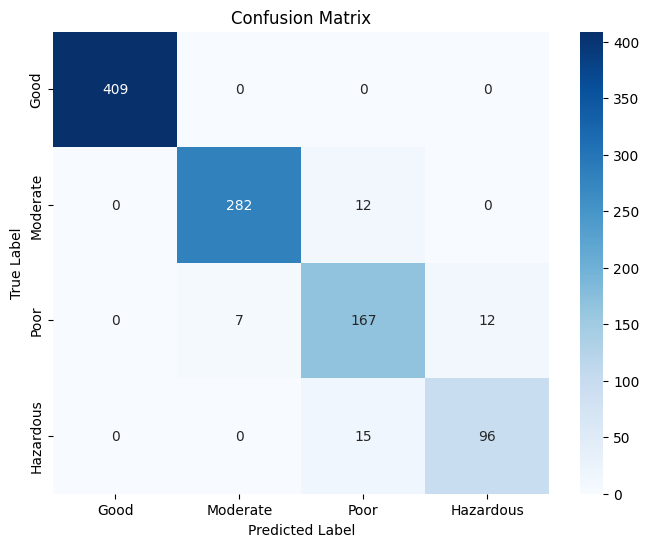

In [23]:
def evaluate_model(model, X_test, y_test, class_names):
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    y_pred = model.predict(X_test)

    y_pred_labels = np.argmax(y_pred, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    print("\nClassification Report:")
    print(classification_report(y_test_labels, y_pred_labels, target_names=class_names))

    cm = confusion_matrix(y_test_labels, y_pred_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

class_names = ['Good', 'Moderate', 'Poor', 'Hazardous']
evaluate_model(model, X_test_scaled, y_test, class_names)

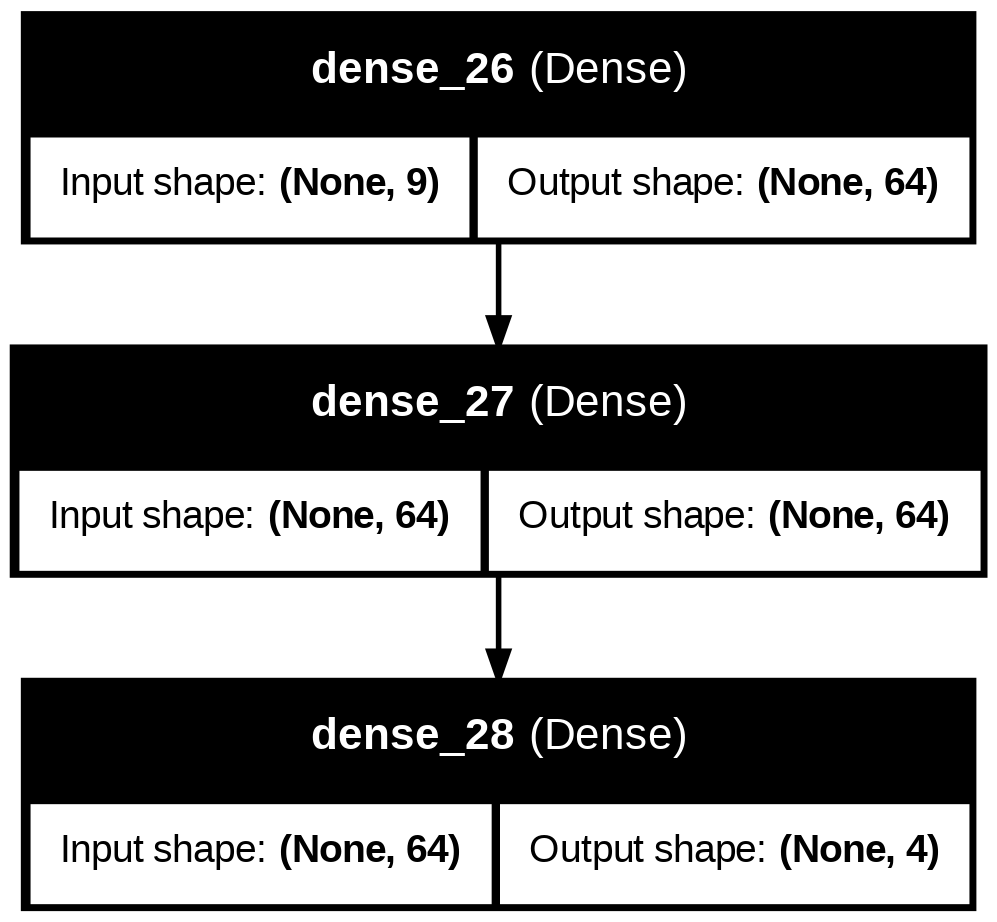

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Task: Print out the Final Model Accuracy and plot the Loss curve

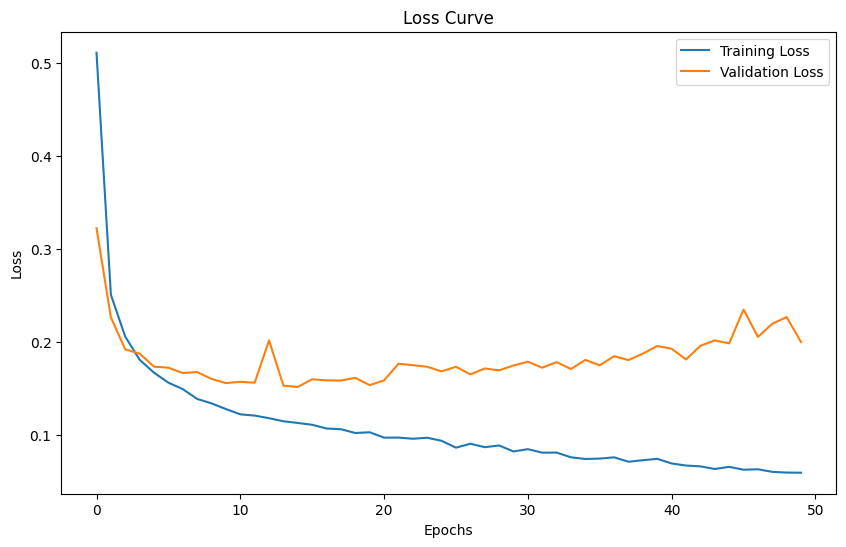

In [24]:
def plot_loss_curve(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()
    plt.show()

plot_loss_curve(history)

# SECTION 2: Optimization and Regularization Combinations

## Second model

In [31]:
target_columns = ['Air Quality_Good', 'Air Quality_Moderate', 'Air Quality_Poor', 'Air Quality_Hazardous']
X, y = prepare_data(df_encoded, target_columns)

X_train, X_test, y_train, y_test = split_data(X, y)

X_train_scaled, X_test_scaled, _ = scale_features(X_train, X_test)

model_2, callbacks = define_model(
    optimization='nadam',
    regularization_datatype=None,
    early_stopping=True,
    dropout=0.2,
    learning_rate=0.003
)

history_2 = train_model(model_2, X_train_scaled, y_train)

save_nn_model(model_2, 'nn_model_nadam.keras')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7341 - loss: 0.6393 - val_accuracy: 0.9137 - val_loss: 0.2044
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9007 - loss: 0.2343 - val_accuracy: 0.9312 - val_loss: 0.1759
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9217 - loss: 0.1960 - val_accuracy: 0.9425 - val_loss: 0.1680
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9347 - loss: 0.1648 - val_accuracy: 0.9388 - val_loss: 0.1635
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9381 - loss: 0.1483 - val_accuracy: 0.9400 - val_loss: 0.1534
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9462 - loss: 0.1382 - val_accuracy: 0.9262 - val_loss: 0.1778
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9414 - loss: 0.1421 - val_accuracy: 0.9287 - val_loss: 0.1660
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9410 - loss: 0.1441 - val_accuracy: 0.9250 - val_

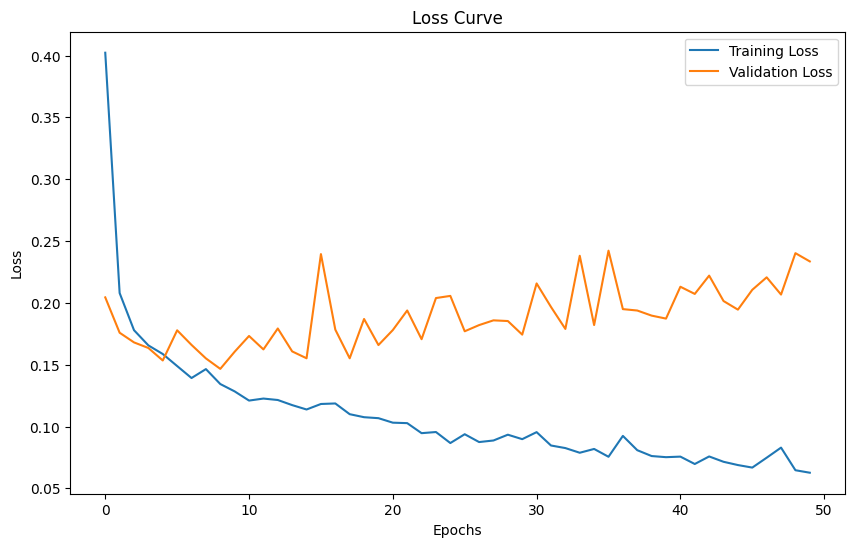

Test Accuracy: 0.9560
Test Loss: 0.1421
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
    Moderate       0.98      0.96      0.97       294
        Poor       0.87      0.90      0.88       186
   Hazardous       0.88      0.86      0.87       111

    accuracy                           0.96      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.96      0.96      0.96      1000



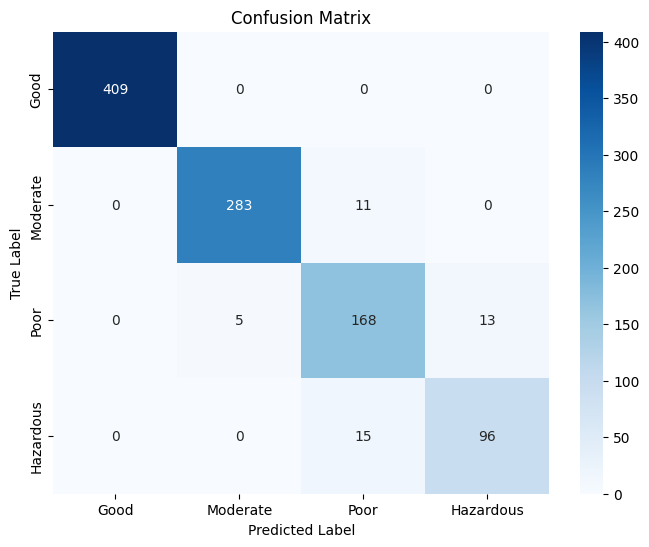

In [32]:
plot_loss_curve(history_2)
class_names = ['Good', 'Moderate', 'Poor', 'Hazardous']
evaluate_model(model_2, X_test_scaled, y_test, class_names)

## Third model

In [29]:
target_columns = ['Air Quality_Good', 'Air Quality_Moderate', 'Air Quality_Poor', 'Air Quality_Hazardous']
X, y = prepare_data(df_encoded, target_columns)

X_train, X_test, y_train, y_test = split_data(X, y)

X_train_scaled, X_test_scaled, _ = scale_features(X_train, X_test)

model_3, callbacks = define_model(
    optimization='adam',
    regularization_datatype=regularizers.l2(0.001),
    early_stopping=True,
    dropout=0.3,
    learning_rate=0.0005
)

history_3 = train_model(model_3, X_train_scaled, y_train)

save_nn_model(model_3, 'nn_model_adaml2.keras')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6322 - loss: 1.0470 - val_accuracy: 0.8725 - val_loss: 0.5118
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8425 - loss: 0.4975 - val_accuracy: 0.9038 - val_loss: 0.3747
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.3975 - val_accuracy: 0.9137 - val_loss: 0.3222
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8983 - loss: 0.3282 - val_accuracy: 0.9137 - val_loss: 0.2981
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8994 - loss: 0.3109 - val_accuracy: 0.9200 - val_loss: 0.2806
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9144 - loss: 0.2993 - val_accuracy: 0.9262 - val_loss: 0.2624
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9079 - loss: 0.2887 - val_accuracy: 0.9300 - val_loss: 0.2549
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9198 - loss: 0.2703 - val_accuracy: 0.9287 - val_

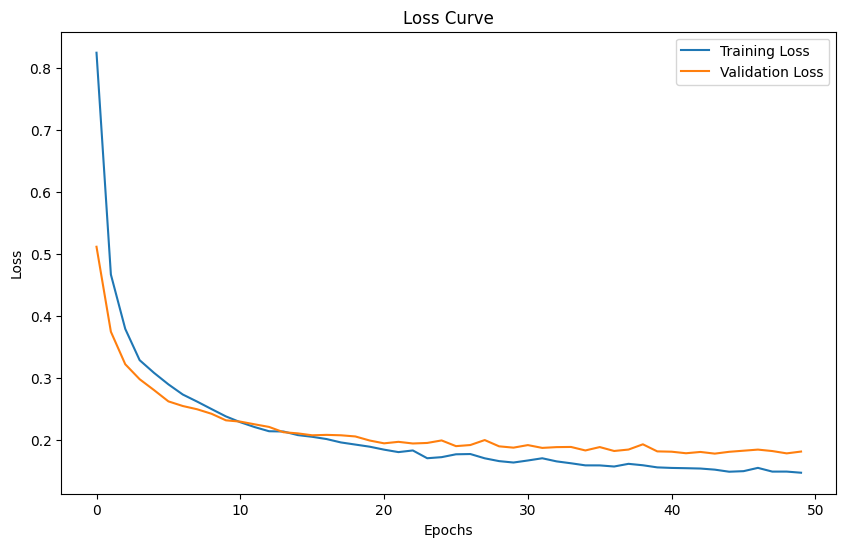

Test Accuracy: 0.9540
Test Loss: 0.1555
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
    Moderate       0.96      0.96      0.96       294
        Poor       0.86      0.90      0.88       186
   Hazardous       0.93      0.85      0.89       111

    accuracy                           0.95      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.95      0.95      0.95      1000



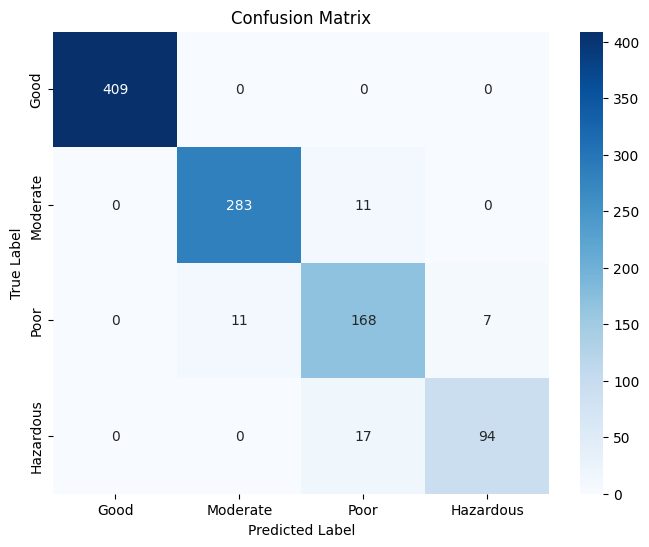

In [30]:
plot_loss_curve(history_3)
class_names = ['Good', 'Moderate', 'Poor', 'Hazardous']
evaluate_model(model_3, X_test_scaled, y_test, class_names)

## Fourth model

In [33]:
target_columns = ['Air Quality_Good', 'Air Quality_Moderate', 'Air Quality_Poor', 'Air Quality_Hazardous']
X, y = prepare_data(df_encoded, target_columns)

X_train, X_test, y_train, y_test = split_data(X, y)

X_train_scaled, X_test_scaled, _ = scale_features(X_train, X_test)

model_4, callbacks = define_model(
    optimization='sgd',
    regularization_datatype=regularizers.l1_l2(0.001),
    early_stopping=True,
    dropout=0.3,
    learning_rate=0.0005
)

history_4 = train_model(model_4, X_train_scaled, y_train)

save_nn_model(model_4, 'nn_model_sgd.keras')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2488 - loss: 1.9988 - val_accuracy: 0.4762 - val_loss: 1.8843
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4358 - loss: 1.8627 - val_accuracy: 0.6150 - val_loss: 1.7875
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5592 - loss: 1.7724 - val_accuracy: 0.6075 - val_loss: 1.7045
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5746 - loss: 1.7046 - val_accuracy: 0.6100 - val_loss: 1.6320
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6013 - loss: 1.6347 - val_accuracy: 0.6200 - val_loss: 1.5709
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5900 - loss: 1.5884 - val_accuracy: 0.6250 - val_loss: 1.5199
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6248 - loss: 1.5310 - val_accuracy: 0.6413 - val_loss: 1.4763
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6158 - loss: 1.4793 - val_accuracy: 0.6562 - val_

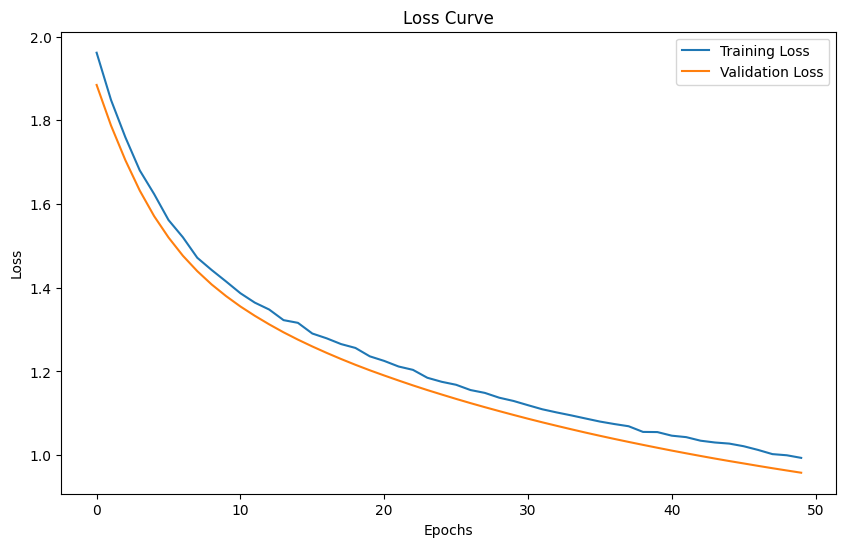

Test Accuracy: 0.8740
Test Loss: 0.9492
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

        Good       0.96      1.00      0.98       409
    Moderate       0.92      0.91      0.92       294
        Poor       0.67      0.83      0.74       186
   Hazardous       0.86      0.38      0.53       111

    accuracy                           0.87      1000
   macro avg       0.85      0.78      0.79      1000
weighted avg       0.88      0.87      0.87      1000



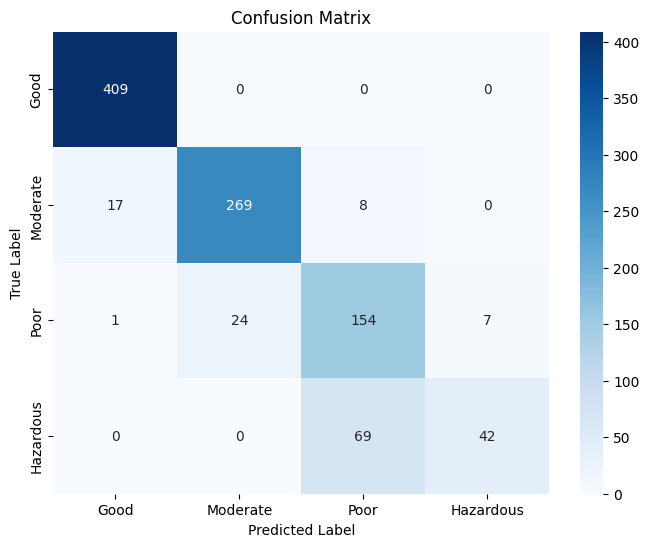

In [34]:
plot_loss_curve(history_4)
class_names = ['Good', 'Moderate', 'Poor', 'Hazardous']
evaluate_model(model_4, X_test_scaled, y_test, class_names)

## Fifth model

In [36]:
target_columns = ['Air Quality_Good', 'Air Quality_Moderate', 'Air Quality_Poor', 'Air Quality_Hazardous']
X, y = prepare_data(df_encoded, target_columns)

X_train, X_test, y_train, y_test = split_data(X, y)

X_train_scaled, X_test_scaled, _ = scale_features(X_train, X_test)

model_5, callbacks = define_model(
    optimization='rmsprop',
    regularization_datatype=regularizers.l1_l2(0.001),
    early_stopping=True,
    dropout=0.4,
    learning_rate=0.005
)

history_5 = train_model(model_5, X_train_scaled, y_train)

save_nn_model(model_5, 'nn_model_rmsprop.keras')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7907 - loss: 0.8516 - val_accuracy: 0.9200 - val_loss: 0.3944
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9022 - loss: 0.3878 - val_accuracy: 0.9400 - val_loss: 0.3051
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9251 - loss: 0.3139 - val_accuracy: 0.9275 - val_loss: 0.2938
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9274 - loss: 0.2736 - val_accuracy: 0.9137 - val_loss: 0.2749
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9318 - loss: 0.2518 - val_accuracy: 0.9312 - val_loss: 0.2466
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9385 - loss: 0.2391 - val_accuracy: 0.9350 - val_loss: 0.2247
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9318 - loss: 0.2380 - val_accuracy: 0.9200 - val_loss: 0.2524
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9306 - loss: 0.2479 - val_accuracy: 0.9400 - val_

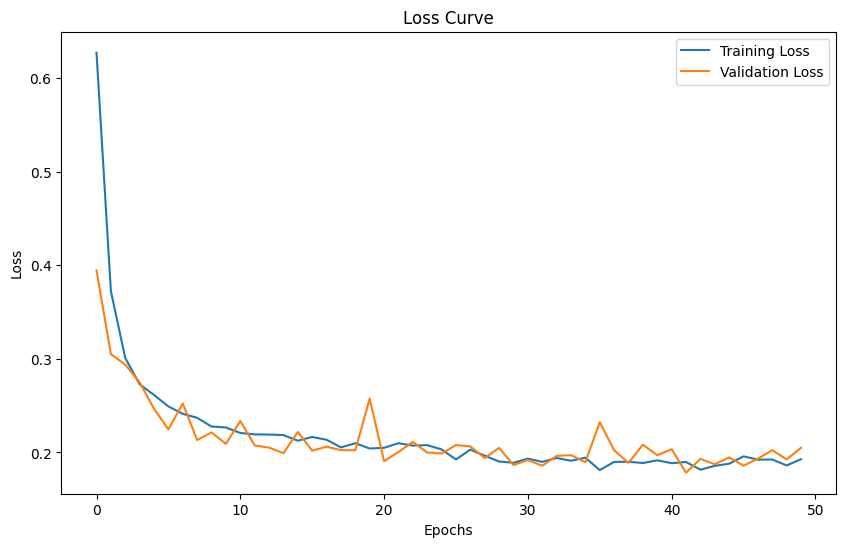

Test Accuracy: 0.9540
Test Loss: 0.1724
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
    Moderate       0.97      0.96      0.97       294
        Poor       0.89      0.86      0.87       186
   Hazardous       0.86      0.92      0.89       111

    accuracy                           0.95      1000
   macro avg       0.93      0.94      0.93      1000
weighted avg       0.95      0.95      0.95      1000



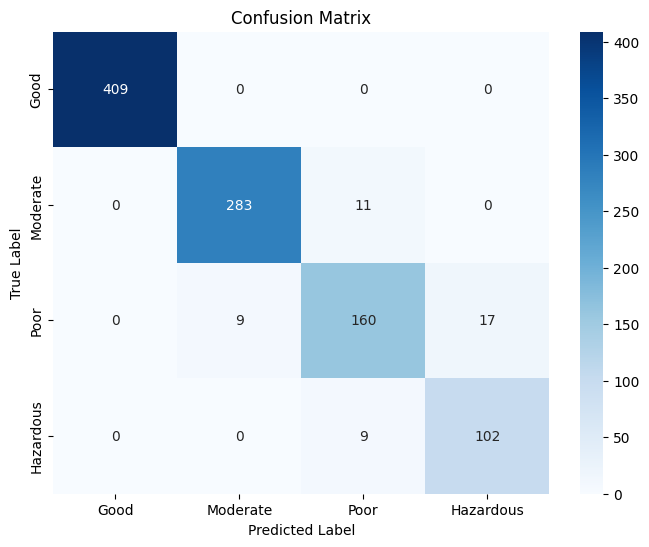

In [37]:
plot_loss_curve(history_5)
class_names = ['Good', 'Moderate', 'Poor', 'Hazardous']
evaluate_model(model_5, X_test_scaled, y_test, class_names)

#Task: Make Predictions using the best saved model


In [38]:
def make_predictions(model_path, X):
    model = load_model(model_path)
    probabilities = model.predict(X)
    predictions = np.argmax(probabilities, axis=1)

    return predictions

In [39]:
model_path = '/content/nn_model_rmsprop.keras'
make_predictions(model_path, X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,